In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

pada folder dataset rockpaperscissors, saya membagi rps-cv-images sebagai data test yang **tidak dilakukan TRAINING**, sementara folder yang lain saya kelompokan **menjadi nama folder train**


/content/drive<br>
--- train<br>
-rock<br>
-paper<br>
-scissors<br>

--- rps-cv-images<br>
-rock<br>
-paper<br>
-scissors<br>


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**image augmentation**


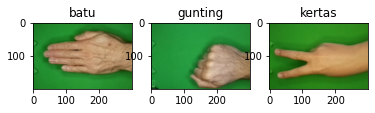

In [14]:
from os import listdir
import matplotlib.pyplot as plt

path = '/content/drive/My Drive/image/'
img_total=[]
imagesList = listdir(path)
for i in range (len(imagesList)):
    img=path+imagesList[i]
    img_total.append(img)

    
img0=plt.imread(img_total[0])
img1=plt.imread(img_total[1])
img2=plt.imread(img_total[2])


fig, axes = plt.subplots(nrows=1, ncols=3)
cmaps = ['batu', 'gunting', 'kertas']

for ax, cmap,im in zip(axes.flat, cmaps,img_total):
    ax.set(title=cmap)
    
axes[0].imshow(img0, 'gray')
axes[1].imshow(img1, 'gray')
axes[2].imshow(img2, 'gray')

plt.show()

**Data Generator**

In [15]:
datagen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    rotation_range=2.5,
    rescale=1.0/255.0,
    validation_split=0.4
)

**training and validation generator, 1314 images and 874 images**

In [61]:
training_generator = datagen.flow_from_directory('/content/drive/My Drive/train/', target_size=(64,64), batch_size=32, subset='training')
validation_generator = datagen.flow_from_directory('/content/drive/My Drive/train/', target_size=(64,64), batch_size=32, subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**cnn_model is sequential**

In [62]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=32, kernel_size=4, activation='relu', input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Conv2D(filters=32, kernel_size=4, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(Dropout(rate=0.25))

# cnn_model.add(Conv2D(filters=32, kernel_size=4, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(Dropout(rate=0.25))

# cnn_model.add(Conv2D(filters=32, kernel_size=4, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(Dropout(rate=0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dense(units=3, activation='softmax'))

cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 61, 61, 32)        1568      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 27, 27, 32)        16416     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)             

In [64]:

modelcheckpoint = ModelCheckpoint(
    filepath='./model.hdf5',
    monitor='loss',
    save_best_only=True,
    period=1
)

In [65]:
# Untuk mencatat error dan akurasi pada setiap epoch pelatihan

csvlogger = CSVLogger(filename='history.csv')

In [66]:
# Untuk menghentikan training jika tidak ada perbaikan error
# pada 5 epoch pelatihan terakhir

earlystopping = EarlyStopping(
    monitor='loss', 
    min_delta=0.001, 
    patience=10
)

**Callback**

In [67]:

cnn_model_history = cnn_model.fit_generator(
    generator=training_generator,
    steps_per_epoch=len(training_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=20,
    callbacks=[modelcheckpoint, csvlogger, earlystopping],
)

Epoch 1/20
42/42 [==============================] - 18s 430ms/step - loss: 0.8973 - accuracy: 0.5495 - val_loss: 0.6135 - val_accuracy: 0.7529
Epoch 2/20
42/42 [==============================] - 18s 429ms/step - loss: 0.5060 - accuracy: 0.8219 - val_loss: 0.3551 - val_accuracy: 0.8822
Epoch 3/20
42/42 [==============================] - 18s 424ms/step - loss: 0.3096 - accuracy: 0.8912 - val_loss: 0.2302 - val_accuracy: 0.9222
Epoch 4/20
42/42 [==============================] - 18s 427ms/step - loss: 0.1713 - accuracy: 0.9429 - val_loss: 0.1605 - val_accuracy: 0.9428
Epoch 5/20
42/42 [==============================] - 18s 428ms/step - loss: 0.1523 - accuracy: 0.9406 - val_loss: 0.1416 - val_accuracy: 0.9588
Epoch 6/20
42/42 [==============================] - 18s 426ms/step - loss: 0.1057 - accuracy: 0.9658 - val_loss: 0.1173 - val_accuracy: 0.9622
Epoch 7/20
42/42 [==============================] - 18s 423ms/step - loss: 0.0991 - accuracy: 0.9650 - val_loss: 0.0965 - val_accuracy: 0.9737

**EVALUATION MODEL**

In [68]:
print(cnn_model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [69]:
plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**TEST**

In [73]:
from keras.models import load_model
from skimage.transform import resize

In [74]:
model=load_model('./model.hdf5')

In [75]:
file_gambar='/content/drive/My Drive/rps-cv-images/paper/0a3UtNzl5Ll3sq8K.png'

In [77]:
import cv2

In [84]:
 my_image = cv2.imread(file_gambar)
 my_image1=plt.imread(file_gambar)

In [85]:
      my_image_resized = resize(my_image, (64,64,3)) #karena menggunakan model 64,64

      coba1=model.predict(np.array( [my_image_resized,] ))

In [86]:
d = dict(enumerate(coba1.flatten(), 1))

In [87]:
print(d)

{1: 0.9999926, 2: 3.7798102e-06, 3: 3.5378134e-06}


In [89]:
if (np.amax(coba1)in d.values())== True: #cek ada nilai max di dict ga?
            for key, value in d.items():  #ambil nilai dari value dict
                if (np.amax(coba1)) == value:
            #print (key) #menampilkan kelas 
                    if key <=4:
                        if key==1:
                          print("paper")
                        elif key==2:
                          print("rock")
                        elif key==3:
                          print("scissors")
            imgplot = plt.imshow( my_image1)
            plt.show()

paper


**AYO KITA COBA PAKE GAMBAR TEST ROCK**

In [90]:
file_gambar='/content/drive/My Drive/rps-cv-images/rock/0bioBZYFCXqJIulm.png'

In [91]:
my_image = cv2.imread(file_gambar)
my_image1=plt.imread(file_gambar)
my_image_resized = resize(my_image, (64,64,3)) #karena menggunakan model 64,64

coba1=model.predict(np.array( [my_image_resized,] ))
d = dict(enumerate(coba1.flatten(), 1))
if (np.amax(coba1)in d.values())== True: #cek ada nilai max di dict ga?
            for key, value in d.items():  #ambil nilai dari value dict
                if (np.amax(coba1)) == value:
            #print (key) #menampilkan kelas 
                    if key <=4:
                        if key==1:
                          print("paper")
                        elif key==2:
                          print("rock")
                        elif key==3:
                          print("scissors")
            imgplot = plt.imshow(my_image1)
            plt.show()

rock


**AYO KITA COBA PAKE GAMBAR TEST SCISSORS**

In [93]:
file_gambar='/content/drive/My Drive/rps-cv-images/scissors/0Ug54ifXRqqlZS2Z.png'
my_image = cv2.imread(file_gambar)
my_image1=plt.imread(file_gambar)
my_image_resized = resize(my_image, (64,64,3)) #karena menggunakan model 64,64

coba1=model.predict(np.array( [my_image_resized,] ))
d = dict(enumerate(coba1.flatten(), 1))
if (np.amax(coba1)in d.values())== True: #cek ada nilai max di dict ga?
            for key, value in d.items():  #ambil nilai dari value dict
                if (np.amax(coba1)) == value:
            #print (key) #menampilkan kelas 
                    if key <=4:
                        if key==1:
                          print("paper")
                        elif key==2:
                          print("rock")
                        elif key==3:
                          print("scissors")
            imgplot = plt.imshow(my_image1)
            plt.show()

scissors


saya menggunakan metode callback **modelcheckpoint, csvlogger, earlystopping**. untuk mengecek setiap check point, membuat history dan mendapatkan model terbaik.

saya menggunakan 2 layer, 64X64 dengan batch size 32, secara sequential dengan fungsi aktivasi relu serta menggunakan fungsi aktivasi relu dan softmax pada flattening dengan optimasi adam.

berdasarkan data training didapatkan score 97% dan cenderung model tidak overfit atau underfit.

pada tahap test menggunakan data yang tidak dilakukan training yaitu dengan **folder rps-cv-images** untuk mengevaluasi model bila di test dengan selain data training.

hasilnya akurat, dari 3 jenis gambar. model dapat mengenali gambar secara akurat. 

saran perlu dilakukan test lanjutan secara masif agar diketahui model fit atau tidak terhadap data test.


-----------------------------------------------------------
**Profil Peserta**

Nama Lengkap : Ilham Winar Nugroho <br>
Nomer Telepon : 087838014299 <br>
Domisili : Tangerang <br>
Tentang Saya : Tertarik Belajar Machine Learning <br>
Pekerjaan : Pegawai BUMN <br>